In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

In [325]:
X_train = pd.read_csv('X.csv')
X_train.sample(5)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
2366,1745,1745,41.0,F,p,senior|software|enginee,13.0,chin,Korean,1.668087,81.599234,1745,480.0
4965,1510,1510,55.0,M,p,software|engineer|manage,19.0,chin,Chinese,1.972943,113.721763,1510,918.0
2282,2124,2124,35.0,F,bachelor's|degr,full|stack|enginee,8.0,u,Asian,1.854081,51.094900,2124,231.0
2236,171,171,30.0,M,bachelor,junior|marketing|coordinato,4.0,canad,Asian,1.922914,68.051996,171,58.0
4312,5144,5144,27.0,M,bachelor's|degr,marketing|analys,4.0,australi,White,1.921668,53.316889,5144,52.0


In [326]:
y_train = pd.read_csv('y.csv')
y_train.head(5)

,id,Salary
0,2477,175966.0
1,76,160000.0
2,64,35000.0
3,924,195000.0
4,242,120000.0


In [327]:
X_test = pd.read_csv('X_test.csv')
X_test.head(5)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,6480,6480,47.0,M,master's|degr,director|of|marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0
1,5343,5343,29.0,F,bachelor's|degr,social|media|manage,4.0,us,African American,1.562833,59.760856,5343,81.0
2,2576,2576,29.0,M,high|scho,back|end|develope,5.0,us,African American,2.059395,46.765234,2576,108.0
3,6103,6103,40.0,M,master's|degr,marketing|directo,15.0,us,Asian,2.482954,89.530121,6103,532.0
4,3290,3290,29.0,M,bachelor's|degr,software|enginee,6.0,us,African American,1.639781,42.973461,3290,112.0


In [328]:
X_train.drop('Unnamed: 0.1', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis =1, inplace=True)
X_test.drop('Unnamed: 0.1', axis=1, inplace=True)
X_test.drop('Unnamed: 0', axis =1, inplace=True)

In [329]:
X_train.describe().style.format("{:.2f}")

,Age,Years of Experience,height,weight,id,professionalism
count,5359.00,5360.00,5363.00,5361.00,5363.00,5360.00
mean,35.15,9.66,2.00,66.94,3362.79,316.37
std,7.62,6.44,0.29,18.35,1934.20,304.99
min,22.00,1.00,1.50,13.64,0.00,0.00
25%,29.00,5.00,1.75,53.89,1692.50,84.00
50%,33.00,8.00,2.00,64.75,3363.00,217.00
75%,39.00,13.00,2.26,78.37,5044.50,451.00
max,64.00,120.00,2.50,200.00,6703.00,2040.00


In [330]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   id                   5363 non-null   int64  
 10  professionalism      5360 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 461.0+ KB


In [331]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5363 non-null   int64  
 1   Salary  5358 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 83.9 KB


In [332]:
X_train.nunique()

Age                      43
Gender                    3
Education Level           6
Job Title               175
Years of Experience      40
Country                   6
Race                     11
height                 5363
weight                 5360
id                     5363
professionalism         274
dtype: int64

In [333]:
X_train.isnull().sum()

Age                    4
Gender                 4
Education Level        3
Job Title              2
Years of Experience    3
Country                0
Race                   0
height                 0
weight                 2
id                     0
professionalism        3
dtype: int64

In [334]:
merged_df = pd.merge(X_train, y_train, on='id')

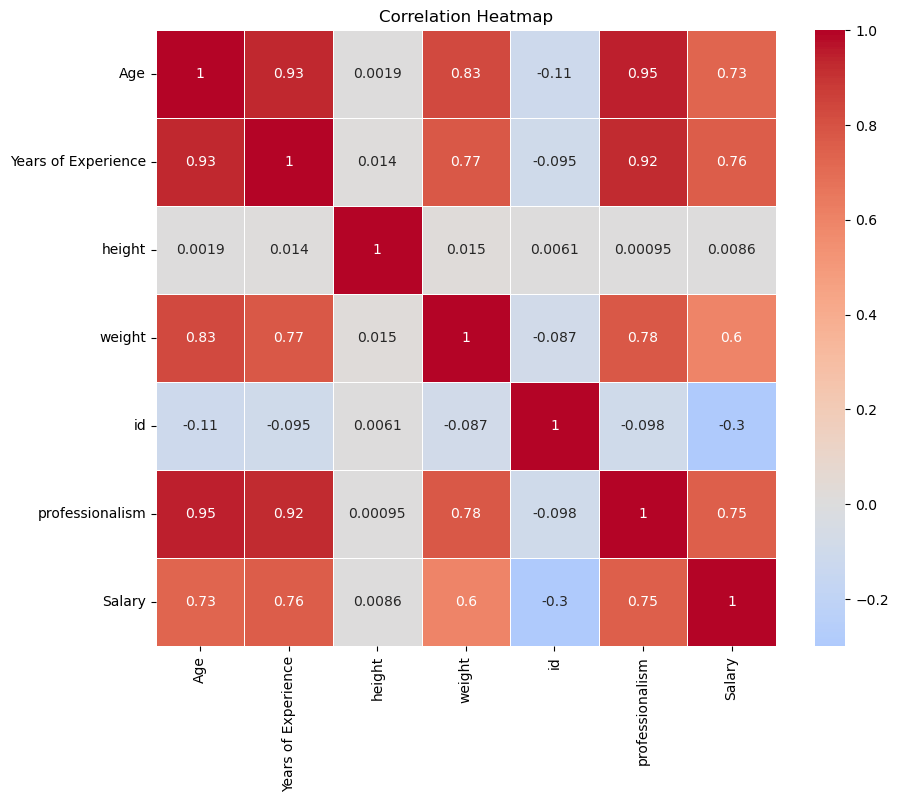

In [335]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [336]:
merged_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0
4,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0


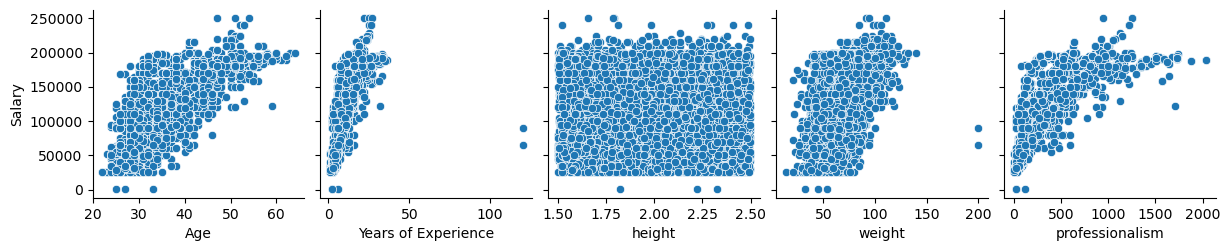

In [337]:
sns.pairplot(merged_df, x_vars=['Age', 'Years of Experience', 'height', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

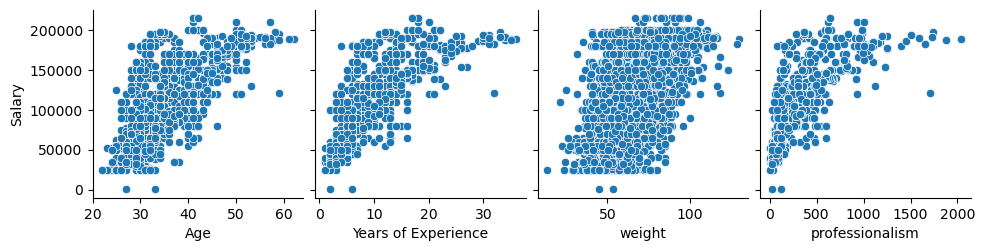

In [338]:
df_female = merged_df.loc[merged_df['Gender'] == 'F']

sns.pairplot(df_female, x_vars=['Age', 'Years of Experience', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

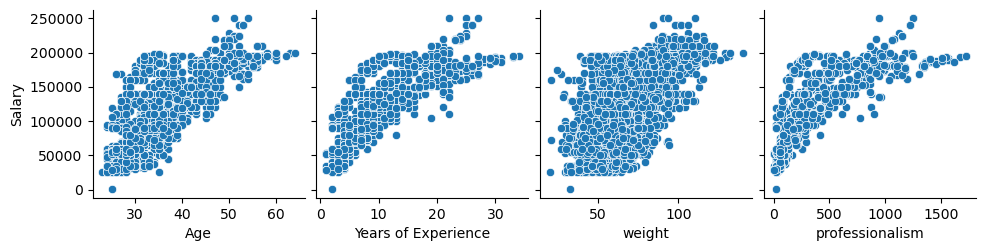

In [339]:
df_male = merged_df.loc[merged_df['Gender'] == 'M']

sns.pairplot(df_male, x_vars=['Age', 'Years of Experience', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

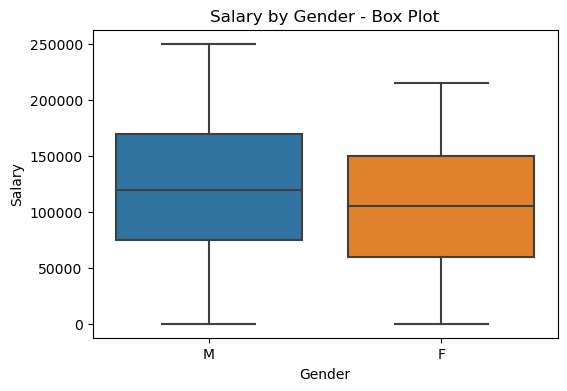

In [340]:
merged_df = merged_df[merged_df['Gender'].isin(['F', 'M'])]

plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=merged_df)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary by Gender - Box Plot')
plt.show()

In [341]:
# Independent t-test to understand if The differences significant
import scipy.stats as stats

female_salaries = merged_df[merged_df['Gender'] == 'F']['Salary']
male_salaries = merged_df[merged_df['Gender'] == 'M']['Salary']

female_salaries = female_salaries.dropna()
male_salaries = male_salaries.dropna()

t_statistic, p_value = stats.ttest_ind(female_salaries, male_salaries, alternative='two-sided') #'two-sided' = means are not equal

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The differences in salary between Female and Male are statistically significant")
else:
    print("The differences in salary between Female and Male are not statistically significant")

t-statistic: -8.670569924715746
p-value: 5.626675237601645e-18
The differences in salary between Female and Male are statistically significant


In [342]:
merged_df['Job Title'].count()

5347

In [343]:
role_level = ['junior', 'juniour', 'senior', 'director', 'chief', 'vp', 'training']

merged_df['new_col_role_level'] = merged_df['Job Title'].apply(lambda x: x.split('|')[0].lower() if x.split('|')[0].lower() in role_level else 'null')

merged_df['new_col_role_level'] = merged_df['new_col_role_level'].replace("juniour", "junior")
print(merged_df['new_col_role_level'].unique())

['null' 'junior' 'senior' 'director' 'training' 'chief' 'vp']


In [344]:
merged_df['Job Title'] = merged_df['Job Title'].apply(lambda x: x.replace(x.split('|')[0].lower(),"") if x.split('|')[0].lower() in role_level else x)

merged_df['Job Title'] = merged_df['Job Title'].apply(lambda x: x[0].replace('|',"") if x[0] == "|" else x.replace('|',"_"))

#merged_df['Job Title'] = merged_df['Job Title'].apply(lambda x: x.replace('|',"_"))
#merged_df['Job Title'] = merged_df['Job Title'].apply(lambda x: x[0].replace('_',"") if "_" == x[0] else x)
                                                      
merged_df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary,new_col_role_level
4356,27.0,M,high|scho,,3.0,us,White,2.176937,43.139455,4739,25.0,30000.0,junior
4297,44.0,F,master's|degr,digital_marketing_manage,16.0,australi,White,2.493357,90.318636,6541,588.0,140000.0,null
2022,41.0,F,master's|degr,marketing_manage,16.0,canad,Black,1.910785,85.907108,5263,546.0,170000.0,null
4722,40.0,M,master's|degr,full_stack_enginee,16.0,u,White,2.270175,66.017443,2811,570.0,171652.0,null
3671,40.0,M,master's|degr,marketing_directo,15.0,u,Asian,1.652620,67.454557,6089,532.0,195000.0,null
964,33.0,F,master's|degr,full_stack_enginee,7.0,australi,Asian,1.878496,63.789812,1997,192.0,115000.0,null
561,27.0,F,bachelor's|degr,,3.0,australi,White,2.411231,63.338413,3883,26.0,35000.0,junior
163,34.0,M,bachelor,software_enginee,9.0,chin,White,2.291457,50.597268,995,256.0,180000.0,null
4337,25.0,F,bachelor's|degr,,2.0,canad,White,2.455636,53.579753,2796,0.0,52831.0,senior
3862,37.0,F,p,,11.0,chin,Chinese,1.962355,65.465984,6497,315.0,95000.0,senior


In [345]:
value_counts_over_50 = merged_df['Job Title'].value_counts()[merged_df['Job Title'].value_counts() >= 50]
value_counts_over_50.head()

                            1418
software_enginee             423
data_scientis                350
software_engineer_manage     298
data_analys                  278
Name: Job Title, dtype: int64

In [346]:
filtered_df = merged_df[merged_df['Job Title'].isin(value_counts_over_50.index)]

average_salary_for_job = filtered_df.groupby('Job Title')['Salary'].mean().round(2)

average_salary_for_job_desc = average_salary_for_job.sort_values(ascending=False)
average_salary_for_job_desc.head()

Job Title
marketing_directo           184509.80
software_engineer_manage    171443.65
data_scientis               166034.29
research_scientis           164017.86
research_directo            163962.26
Name: Salary, dtype: float64

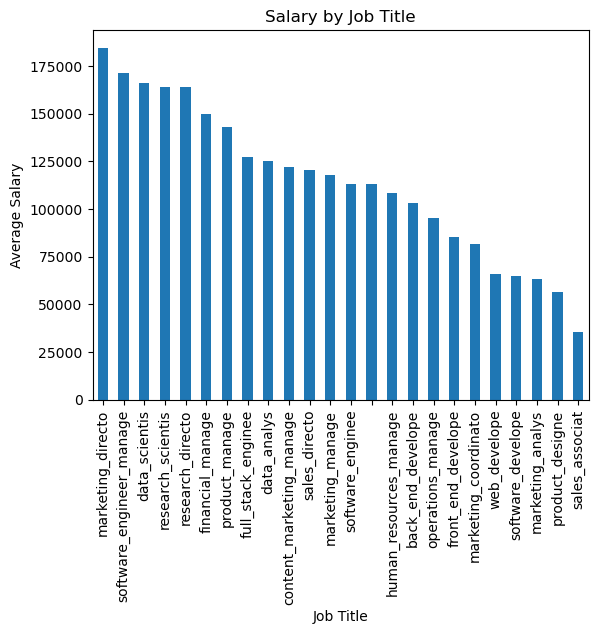

In [347]:
average_salary_for_job_desc.plot(kind = 'bar')

plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [348]:
#There does not appear to be an effect of country on salary
average_salary_by_country = merged_df.groupby('Country')['Salary'].mean()
average_salary_by_country

Country
australi    115334.338332
canad       117215.063551
chin        115955.423114
u           116332.598703
us          113243.113784
Name: Salary, dtype: float64

In [349]:
#There does not appear to be an effect of race on salary
average_salary_by_race = merged_df.groupby('Race')['Salary'].mean()
average_salary_by_race.sort_values(ascending=False)

Race
Black               120310.091954
Korean              117238.190883
White               117197.745110
Mixed               116242.225455
Asian               116177.856366
Australian          114197.822222
Welsh               113120.034091
Chinese             111477.532951
African American    110176.622711
Hispanic            109507.764940
Name: Salary, dtype: float64

In [350]:
merged_df['Education Level'].unique()

array(["bachelor's|degr", 'bachelor', "master's|degr", 'p', 'master',
       'high|scho', nan], dtype=object)

In [351]:
merged_df['Education Level'] = merged_df['Education Level'].replace("master's|degr", "master").replace("bachelor's|degr", "bachelor")
merged_df = merged_df.dropna(subset=['Education Level'])
merged_df['Education Level'].unique()

array(['bachelor', 'master', 'p', 'high|scho'], dtype=object)

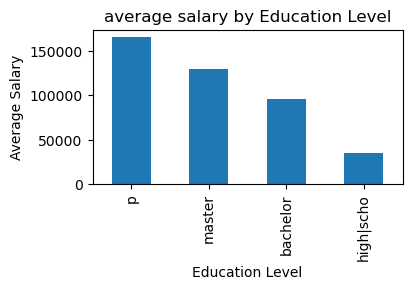

In [352]:
average_salary_by_Education_Level = merged_df.groupby('Education Level')['Salary'].mean()
average_salary_Education_Level_desc = average_salary_by_Education_Level.sort_values(ascending=False)

average_salary_Education_Level_desc.plot(kind = 'bar', figsize=(4,2))

plt.title('average salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()

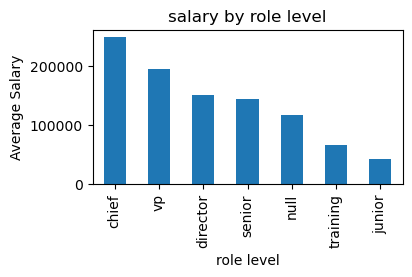

In [353]:
average_salary_by_role_Level = merged_df.groupby('new_col_role_level')['Salary'].mean()
salary_by_role_Level_desc = average_salary_by_role_Level.sort_values(ascending=False).round(2)

salary_by_role_Level_desc.plot(kind = 'bar', figsize=(4,2))

plt.title('salary by role level')
plt.xlabel('role level')
plt.ylabel('Average Salary')
plt.show()

In [354]:
merged_df['new_col_role_level'].unique()

array(['null', 'junior', 'senior', 'director', 'training', 'chief', 'vp'],
      dtype=object)

# regression tree model

In [355]:
from sklearn.tree import DecisionTreeRegressor
merged_df

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary,new_col_role_level
0,52.0,M,bachelor,back_end_develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0,null
1,52.0,F,bachelor,operations_manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0,null
2,27.0,M,bachelor,,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0,junior
3,32.0,M,bachelor,data_analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0,null
4,39.0,F,bachelor,,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,,4.0,canad,Black,2.329507,64.070050,354,93.0,50000.0,junior
5359,44.0,M,p,data_scientis,15.0,chin,White,1.945457,93.478548,3677,546.0,140000.0,null
5360,25.0,M,high|scho,delivery_drive,1.0,canad,Asian,1.575751,38.216264,6032,0.0,28000.0,null
5361,32.0,F,bachelor,software_enginee,6.0,chin,White,1.797528,56.571118,3278,150.0,90000.0,null


In [356]:
merged_df['Gender'] = merged_df['Gender'].replace({'F':0, 'M':1})
merged_df['Education Level'] = merged_df['Education Level'].replace({'high|scho':0, 'bachelor':1, 'master':1, 'p':2})
merged_df['new_col_role_level'] = merged_df['new_col_role_level'].replace({'null':0, 'training':0, 'junior':0, 'senior':1, 'director':1, 'chief':2, 'vp':2})

In [357]:
#New_column for job title for make it in bins

def assign_salary_group(salary):
    if salary < 100000:
        return 'job with low salary'
    elif 100000 < salary < 125000:
        return 'job with medium salary'
    else:
        return 'job with best salary'

merged_df['new_col_job_title']= merged_df['Salary'].apply(assign_salary_group)

merged_df['new_col_job_title']= merged_df['new_col_job_title'].replace({'job with low salary':0, 'job with medium salary':1, 'job with best salary':2})

In [358]:
columns_to_drop = ['Country', 'Race', 'height', 'weight', 'Job Title'] #'Age', 'Years of Experience', 'professionalism'

merged_df.drop(columns = columns_to_drop, axis=1, inplace=True)

In [364]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5346 entries, 0 to 5362
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5346 non-null   int64  
 1   Education Level     5346 non-null   int64  
 2   id                  5346 non-null   int64  
 3   Salary              5343 non-null   float64
 4   new_col_role_level  5346 non-null   int64  
 5   new_col_job_title   5346 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 292.4 KB


In [366]:
merged_df['Salary'] = merged_df['Salary'].fillna(0).astype('int64')

In [367]:
X = merged_df.drop('Salary', axis=1)
y = merged_df['Salary']

In [368]:
model = DecisionTreeRegressor(max_leaf_nodes=7)
model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=7)

In [369]:
!pip install pydot
import pydot
from IPython.display import Image
from six import StringIO

from six import StringIO
from sklearn.tree import export_graphviz

In [370]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=X.columns, leaves_parallel=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png(), width=750)

FileNotFoundError: [WinError 2] "dot" not found in path.